In [2]:
import numpy as np
import pandas as pd

In [3]:
##Importação dos dados de treino

In [4]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_9464\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_9464\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_9464\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [5]:
##Remoção de valores nulos

In [6]:
fd001_train = fd001_train.dropna()
fd001_test = fd001_test.dropna()

In [7]:
##Introdução do cabeçalho do data frame

In [8]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [ ]:
##Seleção de variáveis

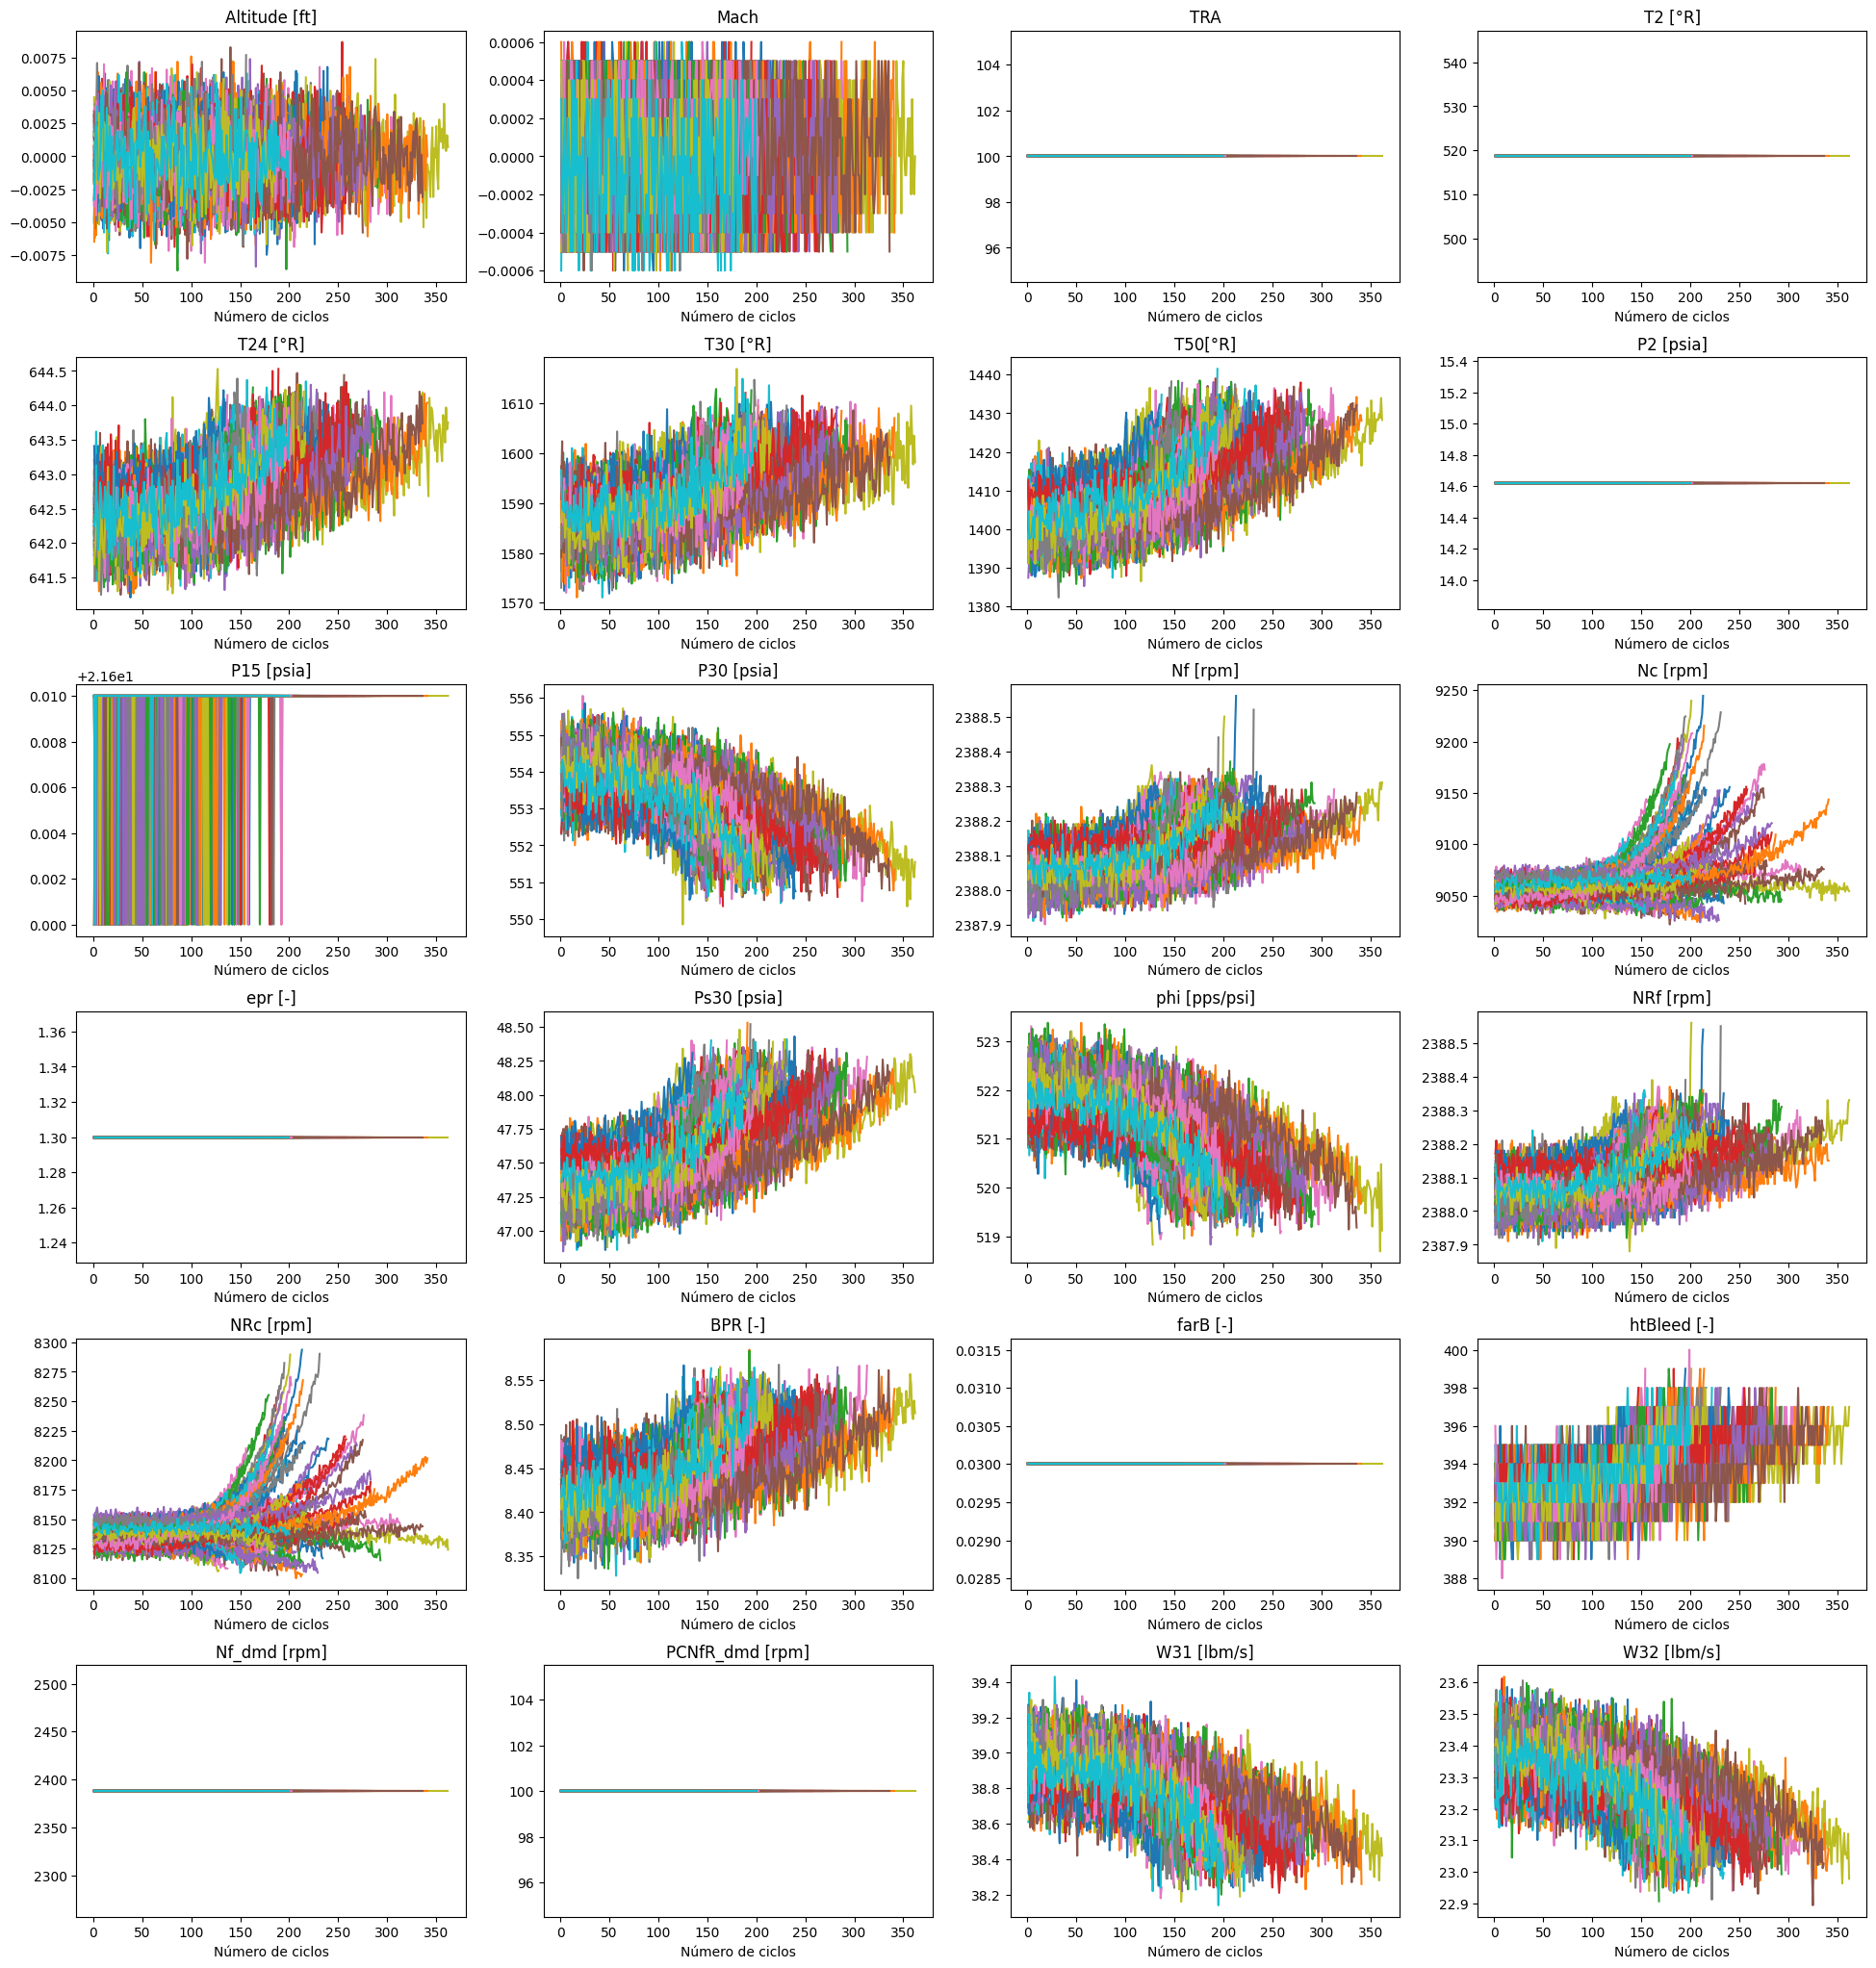

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(24,20))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    fd001_train.groupby('ID').plot(kind='line',x='Nº Ciclos',y=item,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].get_legend().remove()
    axes[i].set_xlabel('Número de ciclos')
    axes[i].set_ylabel('') 

plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.3, wspace = 0.2)
plt.show()

In [10]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]','Nf_dmd [rpm]' ,'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]','Nf_dmd [rpm]','PCNfR_dmd [rpm]']) 

In [11]:
##Normalização 

In [12]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [13]:
##Definição dos targets para regressão nos dados de treino

In [14]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [15]:
##Visualização de um ciclo de vida de um motor 

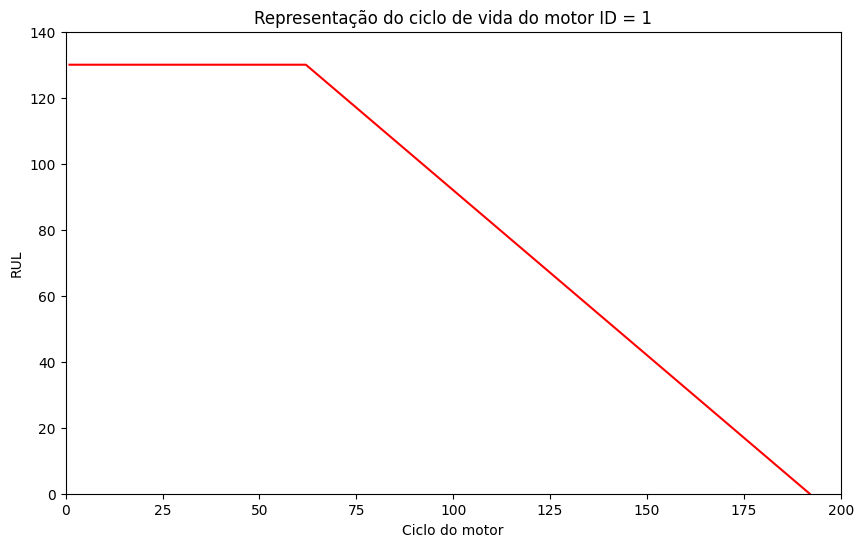

In [16]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [17]:
##Definição dos targets para regressão nos dados de teste 

In [18]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [19]:
##Criação das janelas de tempo para dados de treino e de teste

In [20]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [21]:
##Separação das variáveis de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [23]:
##Criação do modelo LSTM

In [ ]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm=hp.Int('layers_lstm',1,4)
    n_layers_dense=hp.Int('layers_dense',0,1)
    for i in range(n_layers_lstm):
        return_seq = i <n_layers_lstm -1 
        if i == 0:
            model.add(LSTM(hp.Choice(f'lstm_{i}',[32,64,128,256,512]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
        else:
            model.add(LSTM(hp.Choice(f'lstm_{i}',[32,64,128,256,512]),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256,512]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mae', 
              metrics=['mean_squared_error'])
    return model 

tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=15,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=5,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models(num_models=1)[0]
best_trial=tuner_lstm.oracle.get_best_trials(num_trials=1)[0]
param_lstm=best_trial.hyperparameters.get_config()['values']
n_lstm = int(param_lstm.get('layers_lstm',1))
n_dense=int(param_lstm.get('layers_dense',1))+1
best_param_lstm = {}

for k in range(n_lstm):
    key1=f'lstm_{k}'
    key2 = f'dropout_{k}'
    best_param_lstm[key1] = param_lstm[key1]
    best_param_lstm[key2] = param_lstm[key2] 

for k in range(n_dense):
    key3=f'dense_{k}'
    if k < n_dense-1:
        best_param_lstm[key3] = param_lstm[key3]
    else:
        best_param_lstm[key3] = 1

best_param_lstm['learning_rate'] = param_lstm['learning_rate']
print(f'n_lstm = {n_lstm}, n_dense = {n_dense}')
for k,v in best_param_lstm.items():
    print(f'{k:15s} -> {v}')

Trial 15 Complete [00h 02m 15s]
val_loss: 38.588008880615234

Best val_loss So Far: 13.135367393493652
Total elapsed time: 01h 07m 43s
n_lstm = 3, n_dense = 1
lstm_0          -> 32
dropout_0       -> 0.4000000000000001
lstm_1          -> 32
dropout_1       -> 0.30000000000000004
lstm_2          -> 256
dropout_2       -> 0.30000000000000004
dense_0         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 13 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
##Treinamento e teste do modelo LSTM

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 14.7727 - mean_squared_error: 418.9567

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - loss: 14.0313 - mean_squared_error: 375.1694 - val_loss: 11.4372 - val_mean_squared_error: 248.1557
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 13.4835 - mean_squared_error: 347.7437

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - loss: 13.4721 - mean_squared_error: 350.0943 - val_loss: 11.4144 - val_mean_squared_error: 284.7963
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 13.1028 - mean_squared_error: 332.9217

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - loss: 13.0320 - mean_squared_error: 330.4624 - val_loss: 11.0827 - val_mean_squared_error: 243.7622
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 12.9302 - mean_squared_error: 330.7353

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - loss: 12.7384 - mean_squared_error: 319.4645 - val_loss: 11.1411 - val_mean_squared_error: 238.4440
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 12.5478 - mean_squared_error: 307.6389

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - loss: 12.5752 - mean_squared_error: 307.9714 - val_loss: 10.9317 - val_mean_squared_error: 242.6402
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 12.5514 - mean_squared_error: 304.7795

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 12.5224 - mean_squared_error: 304.5580 - val_loss: 11.6773 - val_mean_squared_error: 266.9825
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 12.3307 - mean_squared_error: 297.5041

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - loss: 12.3843 - mean_squared_error: 299.2589 - val_loss: 11.0670 - val_mean_squared_error: 289.3729
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 12.2600 - mean_squared_error: 293.6193

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - loss: 12.1300 - mean_squared_error: 288.1905 - val_loss: 10.7164 - val_mean_squared_error: 251.5317
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 12.0554 - mean_squared_error: 285.8559

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - loss: 12.0721 - mean_squared_error: 287.7869 - val_loss: 11.3583 - val_mean_squared_error: 263.0442
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 11.8261 - mean_squared_error: 273.5839

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 11.8845 - mean_squared_error: 278.3756 - val_loss: 11.4923 - val_mean_squared_error: 310.6013
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 12.0453 - mean_squared_error: 289.8621

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - loss: 12.0021 - mean_squared_error: 285.2379 - val_loss: 11.7824 - val_mean_squared_error: 269.2613
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 12.0115 - mean_squared_error: 286.8743

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - loss: 11.7781 - mean_squared_error: 278.2952 - val_loss: 10.3586 - val_mean_squared_error: 228.7982
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 11.7942 - mean_squared_error: 278.1863

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - loss: 11.7730 - mean_squared_error: 275.4795 - val_loss: 10.7649 - val_mean_squared_error: 233.5724
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 11.6352 - mean_squared_error: 265.6264

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - loss: 11.7093 - mean_squared_error: 272.9726 - val_loss: 10.8815 - val_mean_squared_error: 280.6448
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 11.6472 - mean_squared_error: 269.0981

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - loss: 11.6622 - mean_squared_error: 271.0247 - val_loss: 10.6175 - val_mean_squared_error: 271.9691
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 11.4164 - mean_squared_error: 261.9315

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 11.5171 - mean_squared_error: 266.3669 - val_loss: 9.9430 - val_mean_squared_error: 200.7737
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 11.3685 - mean_squared_error: 259.1424

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - loss: 11.4090 - mean_squared_error: 262.6915 - val_loss: 9.6449 - val_mean_squared_error: 223.3292
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 11.4245 - mean_squared_error: 262.2164

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 11.4239 - mean_squared_error: 262.3697 - val_loss: 11.4538 - val_mean_squared_error: 301.4931
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 11.3804 - mean_squared_error: 260.1234

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 11.4196 - mean_squared_error: 263.0296 - val_loss: 9.8660 - val_mean_squared_error: 225.9632
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 11.3488 - mean_squared_error: 257.7882

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 11.2465 - mean_squared_error: 254.0537 - val_loss: 10.1172 - val_mean_squared_error: 224.8757
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 11.0868 - mean_squared_error: 253.9056

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - loss: 11.1108 - mean_squared_error: 250.6952 - val_loss: 9.8504 - val_mean_squared_error: 214.7600
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 11.4110 - mean_squared_error: 260.7026

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 11.3581 - mean_squared_error: 259.3655 - val_loss: 10.0433 - val_mean_squared_error: 217.9941
319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


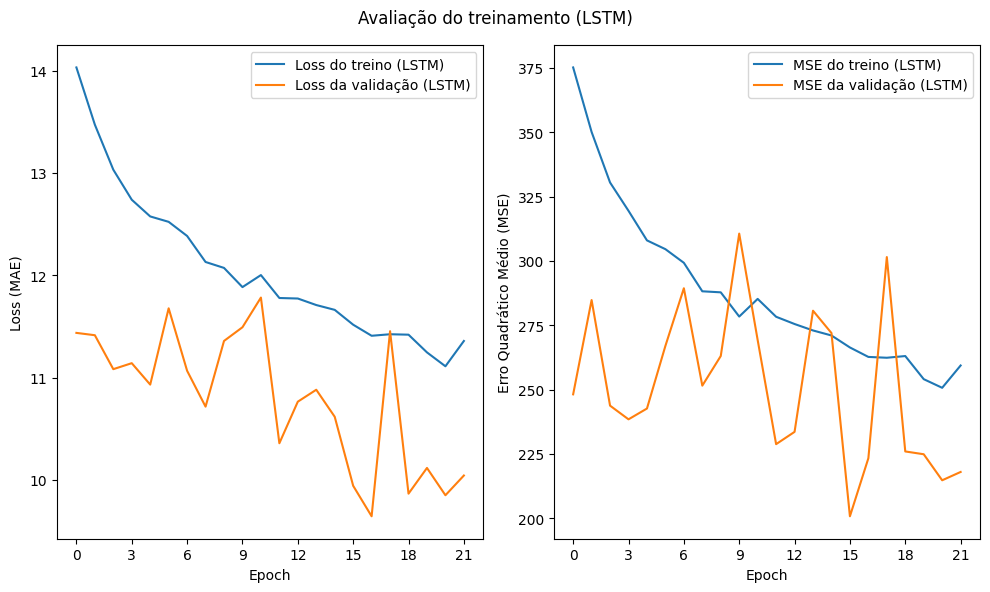

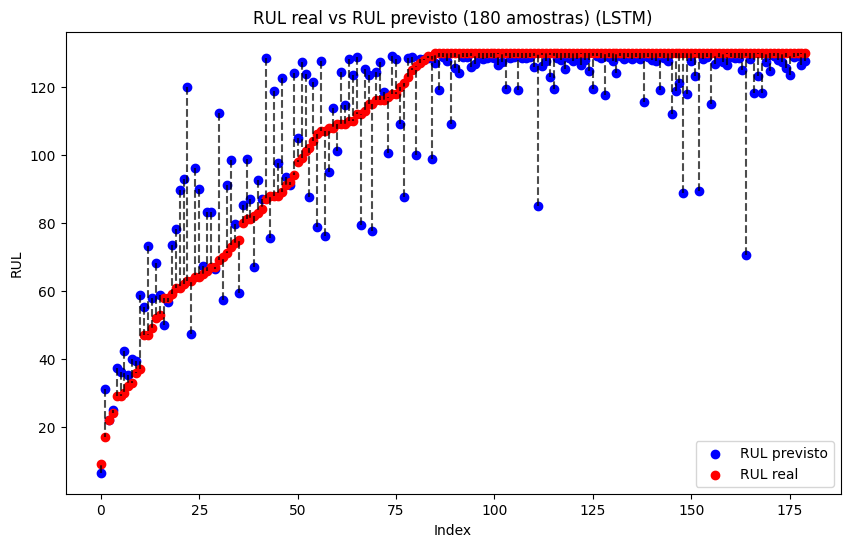

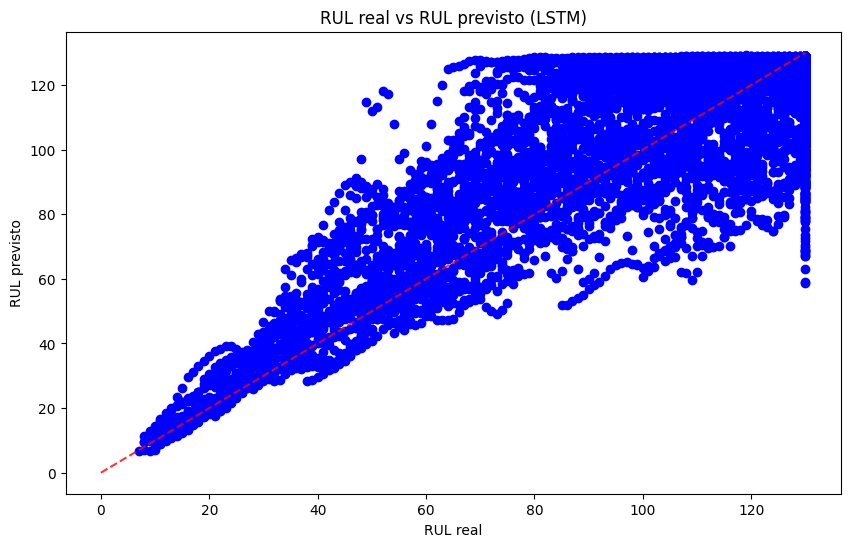

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 11.2305 - mean_squared_error: 254.2567

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 11.1853 - mean_squared_error: 254.0827 - val_loss: 10.1391 - val_mean_squared_error: 233.1944
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 10.9916 - mean_squared_error: 244.6428

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - loss: 11.0902 - mean_squared_error: 248.2361 - val_loss: 9.9619 - val_mean_squared_error: 244.1925
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 11.0803 - mean_squared_error: 250.7932

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 11.0005 - mean_squared_error: 246.0520 - val_loss: 9.9813 - val_mean_squared_error: 209.0733
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 11.2321 - mean_squared_error: 254.3900

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 11.0809 - mean_squared_error: 248.0592 - val_loss: 10.2262 - val_mean_squared_error: 223.3781
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 10.9148 - mean_squared_error: 241.8033

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - loss: 10.9344 - mean_squared_error: 242.6956 - val_loss: 10.1175 - val_mean_squared_error: 223.6062
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 11.0300 - mean_squared_error: 244.7813

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - loss: 10.9656 - mean_squared_error: 244.2790 - val_loss: 10.5890 - val_mean_squared_error: 254.1880
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 10.8788 - mean_squared_error: 239.1535

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 10.9286 - mean_squared_error: 243.2469 - val_loss: 9.7226 - val_mean_squared_error: 203.9242
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 10.9309 - mean_squared_error: 245.5894

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - loss: 10.9218 - mean_squared_error: 243.4554 - val_loss: 9.6279 - val_mean_squared_error: 214.6653
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 10.7504 - mean_squared_error: 235.4587

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - loss: 10.8073 - mean_squared_error: 238.9896 - val_loss: 9.9037 - val_mean_squared_error: 223.6376
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 11.1517 - mean_squared_error: 254.4964

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - loss: 10.9500 - mean_squared_error: 243.4915 - val_loss: 10.3194 - val_mean_squared_error: 220.0567
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 11.0209 - mean_squared_error: 244.1171

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 10.8222 - mean_squared_error: 238.1703 - val_loss: 10.1459 - val_mean_squared_error: 224.3148
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 10.9882 - mean_squared_error: 245.8117

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 10.8783 - mean_squared_error: 243.5527 - val_loss: 10.1888 - val_mean_squared_error: 234.5483
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 10.7030 - mean_squared_error: 231.6293

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 10.7348 - mean_squared_error: 235.4370 - val_loss: 10.3207 - val_mean_squared_error: 267.3175
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 10.7118 - mean_squared_error: 239.8458

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 10.7250 - mean_squared_error: 237.9154 - val_loss: 9.3906 - val_mean_squared_error: 199.0752
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 10.6678 - mean_squared_error: 232.0358

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - loss: 10.7873 - mean_squared_error: 235.8725 - val_loss: 9.6621 - val_mean_squared_error: 215.1937
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 10.5538 - mean_squared_error: 233.9175

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - loss: 10.7062 - mean_squared_error: 237.7137 - val_loss: 9.4338 - val_mean_squared_error: 196.3725
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 10.4854 - mean_squared_error: 226.5561

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 10.6439 - mean_squared_error: 233.1044 - val_loss: 9.8201 - val_mean_squared_error: 208.0912
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 10.7173 - mean_squared_error: 235.4818

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 10.7102 - mean_squared_error: 236.6001 - val_loss: 10.1800 - val_mean_squared_error: 237.5437
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 10.5853 - mean_squared_error: 232.4198

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 10.5695 - mean_squared_error: 231.6769 - val_loss: 9.2830 - val_mean_squared_error: 202.3717
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 10.5956 - mean_squared_error: 228.7001

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 10.6454 - mean_squared_error: 231.2025 - val_loss: 9.2407 - val_mean_squared_error: 206.4733
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 10.5470 - mean_squared_error: 228.3077

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 10.5613 - mean_squared_error: 229.8095 - val_loss: 9.6726 - val_mean_squared_error: 219.5551
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 10.6304 - mean_squared_error: 231.9550

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 10.5858 - mean_squared_error: 232.9502 - val_loss: 9.0632 - val_mean_squared_error: 186.9365
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 10.4443 - mean_squared_error: 227.1847

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - loss: 10.4533 - mean_squared_error: 226.4740 - val_loss: 9.8034 - val_mean_squared_error: 220.8051
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 10.7052 - mean_squared_error: 236.9181

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 10.5873 - mean_squared_error: 233.3832 - val_loss: 10.0173 - val_mean_squared_error: 225.3194
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 10.3907 - mean_squared_error: 225.3867

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 10.4908 - mean_squared_error: 228.1306 - val_loss: 9.7784 - val_mean_squared_error: 209.1644
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 10.3427 - mean_squared_error: 220.5385

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 10.4448 - mean_squared_error: 224.3356 - val_loss: 9.7692 - val_mean_squared_error: 211.8573
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 10.3352 - mean_squared_error: 219.7735

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - loss: 10.4016 - mean_squared_error: 223.2557 - val_loss: 9.8912 - val_mean_squared_error: 218.8743
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 10.4735 - mean_squared_error: 230.1758

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - loss: 10.4739 - mean_squared_error: 227.0303 - val_loss: 9.0225 - val_mean_squared_error: 178.4859
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 10.3028 - mean_squared_error: 223.2784

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 10.3987 - mean_squared_error: 225.4625 - val_loss: 9.7421 - val_mean_squared_error: 200.7327
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 10.3222 - mean_squared_error: 220.3851

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 10.4419 - mean_squared_error: 226.3213 - val_loss: 9.3260 - val_mean_squared_error: 208.9713
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 10.2613 - mean_squared_error: 216.4607

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 10.3402 - mean_squared_error: 222.1124 - val_loss: 10.1988 - val_mean_squared_error: 225.3730
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 10.2641 - mean_squared_error: 223.4119

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - loss: 10.3444 - mean_squared_error: 224.6409 - val_loss: 9.3121 - val_mean_squared_error: 202.0578
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 10.5214 - mean_squared_error: 227.2535

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 194ms/step - loss: 10.3141 - mean_squared_error: 223.0018 - val_loss: 8.8752 - val_mean_squared_error: 181.9325
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 10.3582 - mean_squared_error: 225.5762

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - loss: 10.2871 - mean_squared_error: 222.2770 - val_loss: 9.5793 - val_mean_squared_error: 226.4763
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.3721 - mean_squared_error: 223.7443

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 10.2085 - mean_squared_error: 215.5300 - val_loss: 9.2680 - val_mean_squared_error: 187.6084
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 10.2871 - mean_squared_error: 216.7110

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - loss: 10.1304 - mean_squared_error: 216.1028 - val_loss: 10.0856 - val_mean_squared_error: 217.8617
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 10.2713 - mean_squared_error: 217.8471

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - loss: 10.2873 - mean_squared_error: 221.0451 - val_loss: 9.4671 - val_mean_squared_error: 211.8871
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 10.3507 - mean_squared_error: 223.0062

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 10.2190 - mean_squared_error: 220.0444 - val_loss: 9.1306 - val_mean_squared_error: 184.9820
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 10.2970 - mean_squared_error: 218.0479

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - loss: 10.2764 - mean_squared_error: 218.5117 - val_loss: 8.9964 - val_mean_squared_error: 184.5261
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 10.0030 - mean_squared_error: 214.0842

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - loss: 10.1535 - mean_squared_error: 216.8966 - val_loss: 8.9714 - val_mean_squared_error: 195.7161
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 10.0530 - mean_squared_error: 211.5128

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 10.0499 - mean_squared_error: 210.9688 - val_loss: 9.3928 - val_mean_squared_error: 201.4686
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 10.0323 - mean_squared_error: 212.3447

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 10.0562 - mean_squared_error: 211.9256 - val_loss: 9.9259 - val_mean_squared_error: 227.3059
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 10.3066 - mean_squared_error: 226.7581

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 10.1756 - mean_squared_error: 217.4864 - val_loss: 8.8955 - val_mean_squared_error: 197.8074
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 9.9799 - mean_squared_error: 211.6658

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 10.0889 - mean_squared_error: 213.7243 - val_loss: 9.0753 - val_mean_squared_error: 187.4549
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 9.9473 - mean_squared_error: 208.4498

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - loss: 10.0121 - mean_squared_error: 212.8237 - val_loss: 9.0816 - val_mean_squared_error: 185.9063
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 10.0506 - mean_squared_error: 213.5754

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - loss: 10.0438 - mean_squared_error: 211.0619 - val_loss: 9.1574 - val_mean_squared_error: 200.9688
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 10.0155 - mean_squared_error: 208.7767

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - loss: 10.0443 - mean_squared_error: 211.7966 - val_loss: 8.8957 - val_mean_squared_error: 187.9908
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 10.0292 - mean_squared_error: 209.9222

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - loss: 10.0599 - mean_squared_error: 212.7472 - val_loss: 9.4732 - val_mean_squared_error: 218.8316
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 9.9819 - mean_squared_error: 210.3126

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 9.9370 - mean_squared_error: 210.3797 - val_loss: 9.3359 - val_mean_squared_error: 200.6367
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 9.9429 - mean_squared_error: 209.2094

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - loss: 9.9556 - mean_squared_error: 208.6410 - val_loss: 8.8658 - val_mean_squared_error: 187.6560
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 10.1166 - mean_squared_error: 216.0838

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - loss: 10.0182 - mean_squared_error: 213.7735 - val_loss: 9.2044 - val_mean_squared_error: 190.5866
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 10.1174 - mean_squared_error: 216.4350

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - loss: 9.9698 - mean_squared_error: 209.0921 - val_loss: 9.6461 - val_mean_squared_error: 216.2526
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 10.1687 - mean_squared_error: 218.6847

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - loss: 9.9776 - mean_squared_error: 210.6248 - val_loss: 10.4336 - val_mean_squared_error: 249.1645
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 9.9432 - mean_squared_error: 207.5648

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - loss: 9.9415 - mean_squared_error: 209.6348 - val_loss: 9.0128 - val_mean_squared_error: 198.6736
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 10.0477 - mean_squared_error: 213.3436

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 9.8980 - mean_squared_error: 206.2274 - val_loss: 9.1955 - val_mean_squared_error: 197.0000
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 9.7942 - mean_squared_error: 204.3560

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - loss: 9.8642 - mean_squared_error: 206.2106 - val_loss: 9.5275 - val_mean_squared_error: 207.5753
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 9.9576 - mean_squared_error: 210.1261

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 9.8476 - mean_squared_error: 205.3541 - val_loss: 8.9076 - val_mean_squared_error: 180.7442
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 9.7578 - mean_squared_error: 201.6927

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 9.8183 - mean_squared_error: 202.1825 - val_loss: 8.8353 - val_mean_squared_error: 187.5192
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 9.8488 - mean_squared_error: 203.5772

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 9.7852 - mean_squared_error: 201.1497 - val_loss: 9.6444 - val_mean_squared_error: 224.2392
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 9.9731 - mean_squared_error: 207.1097

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 9.8557 - mean_squared_error: 205.7794 - val_loss: 8.7823 - val_mean_squared_error: 179.1778
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 9.6609 - mean_squared_error: 195.7568

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 9.7916 - mean_squared_error: 201.2057 - val_loss: 8.7903 - val_mean_squared_error: 187.6606
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 9.8951 - mean_squared_error: 206.1292

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 9.7365 - mean_squared_error: 199.8675 - val_loss: 8.4419 - val_mean_squared_error: 182.0605
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 9.7664 - mean_squared_error: 202.4148

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 194ms/step - loss: 9.7494 - mean_squared_error: 200.8788 - val_loss: 9.3569 - val_mean_squared_error: 227.8270
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 9.6172 - mean_squared_error: 197.3959

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 194ms/step - loss: 9.6752 - mean_squared_error: 200.1968 - val_loss: 8.5431 - val_mean_squared_error: 173.3062
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 9.7445 - mean_squared_error: 196.4720

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 9.8438 - mean_squared_error: 203.2378 - val_loss: 8.6102 - val_mean_squared_error: 174.7076
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 9.7977 - mean_squared_error: 203.0255

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 9.6534 - mean_squared_error: 197.4509 - val_loss: 9.1211 - val_mean_squared_error: 188.1768
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 9.6883 - mean_squared_error: 201.1127

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 9.7035 - mean_squared_error: 200.4988 - val_loss: 8.4711 - val_mean_squared_error: 183.4995
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 9.7619 - mean_squared_error: 201.9664

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - loss: 9.6987 - mean_squared_error: 199.4908 - val_loss: 9.8963 - val_mean_squared_error: 216.7005
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 9.6418 - mean_squared_error: 195.9694

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - loss: 9.6369 - mean_squared_error: 195.7997 - val_loss: 8.9218 - val_mean_squared_error: 202.3856
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 9.5248 - mean_squared_error: 192.4395

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - loss: 9.5748 - mean_squared_error: 194.9736 - val_loss: 8.4836 - val_mean_squared_error: 166.9554
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 9.6298 - mean_squared_error: 200.1964

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - loss: 9.5624 - mean_squared_error: 196.0380 - val_loss: 8.8084 - val_mean_squared_error: 184.1266
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 9.5608 - mean_squared_error: 194.0990

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 9.6426 - mean_squared_error: 196.5033 - val_loss: 8.7971 - val_mean_squared_error: 178.5232
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
n_iter = 10
resultados_lstm=[]
for k in range(n_iter):
    start=time.time()
    history_lstm=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])
    rul_prev = best_model_lstm.predict(x_test).reshape(-1)
    end=time.time()
    rul_prev = [float(x) for x in rul_prev]
    mse = mean_squared_error(y_test,rul_prev)
    rmse = np.sqrt(mean_squared_error(y_test,rul_prev))
    mae = mean_absolute_error(y_test,rul_prev)
    r2 = r2_score(y_test,rul_prev)
    tempo = end - start
    resultados_lstm.append({'Iteração':k+1,'MSE':mse,'RMSE':rmse,'MAE':mae,'R2':r2,'tempo':tempo})
    if k == 0: #Gráficos do treinamento e do teste da primeira iteração
        plt.figure(figsize=(10, 6))

        ax1=plt.subplot(1, 2, 1)
        plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
        plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MAE)')
        plt.legend(loc='upper right')
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

        ax2=plt.subplot(1, 2, 2)
        plt.plot(history_lstm.history['mean_squared_error'], label='MSE do treino (LSTM)')
        plt.plot(history_lstm.history['val_mean_squared_error'], label='MSE da validação (LSTM)')
        plt.ylabel('Erro Quadrático Médio (MSE)')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')
        ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

        plt.suptitle('Avaliação do treinamento (LSTM)')
        plt.tight_layout()
        plt.show() 

        n_amostras = 180
        indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
        y_real_amostra=np.array(y_test)[indices]
        y_prev_amostra=np.array(rul_prev)[indices]
        ordem = np.argsort(y_real_amostra)
        y_real_amostra=y_real_amostra[ordem]
        y_prev_amostra=y_prev_amostra[ordem]

        plt.figure(figsize=(10,6))
        plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
        plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
        plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
        plt.ylabel('RUL')
        plt.xlabel('Index')
        plt.legend(loc='lower right')

        for i in range(len(indices)):
            plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
        
        plt.figure(figsize=(10,6))
        plt.scatter(y_test,rul_prev,c='blue')
        plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
        plt.title('RUL real vs RUL previsto (LSTM)')
        plt.ylabel('RUL previsto')
        plt.xlabel('RUL real')

        plt.show()

In [27]:
##Criando modelo BiLSTM

In [28]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi=hp.Int('layers_bi',1,4)
    n_layers_dense=hp.Int('layers_dense',0,1)
    for i in range(n_layers_bi):
        return_seq = i <n_layers_bi -1
        if i == 0:
            model.add(Bidirectional(LSTM(hp.Choice(f'bi_{i}',[32,64,128,256,512]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
        else:
            model.add(Bidirectional(LSTM(hp.Choice(f'bi_{i}',[32,64,128,256,512]),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256,512]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mae', 
              metrics=['mean_squared_error'])
    return model 

tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=15,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_bi',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=5,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models(num_models=1)[0]
best_trial=tuner_bilstm.oracle.get_best_trials(num_trials=1)[0]
param_bi = best_trial.hyperparameters.get_config()['values']
n_bi = int(param_bi.get('layers_bi',1))
n_dense = int(param_bi.get('layers_dense',1)) +1
best_param_bi={}

for k in range(n_bi):
    key1 = f'bi_{k}'
    key2 = f'dropout_{k}'
    best_param_bi[key1] = param_bi[key1]
    best_param_bi[key2] = param_bi[key2]

for k in range(n_dense):
    key3 =f'dense_{k}'
    if k < n_dense -1:
        best_param_bi[key3] = param_bi[key3]
    else:
        best_param_bi[key3] = 1

best_param_bi['learning_rate'] = param_bi['learning_rate'] 
print(f'n_bi = {n_bi}, n_dense = {n_dense}')
for k,v in best_param_bi.items():
    print(f'{k:15s} -> {v}')

Trial 15 Complete [00h 03m 32s]
val_loss: 38.63589096069336

Best val_loss So Far: 11.701972007751465
Total elapsed time: 01h 09m 38s
n_bi = 2, n_dense = 2
bi_0            -> 64
dropout_0       -> 0.30000000000000004
bi_1            -> 64
dropout_1       -> 0.4000000000000001
dense_0         -> 128
dense_1         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
##Treinando e testando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 13.5006 - mean_squared_error: 340.8788

71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - loss: 12.9109 - mean_squared_error: 310.1682 - val_loss: 11.0696 - val_mean_squared_error: 274.8777
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 12.4191 - mean_squared_error: 284.4194

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - loss: 12.5397 - mean_squared_error: 290.7545 - val_loss: 10.5052 - val_mean_squared_error: 231.8566
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 12.1483 - mean_squared_error: 274.0952

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 12.3060 - mean_squared_error: 282.6524 - val_loss: 9.8847 - val_mean_squared_error: 199.2934
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 12.1956 - mean_squared_error: 279.2327

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - loss: 12.2443 - mean_squared_error: 281.8640 - val_loss: 10.3252 - val_mean_squared_error: 202.5866
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 12.2847 - mean_squared_error: 285.4304

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 12.1432 - mean_squared_error: 277.7236 - val_loss: 10.5097 - val_mean_squared_error: 224.8194
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 12.2732 - mean_squared_error: 280.6821

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - loss: 12.1225 - mean_squared_error: 275.6028 - val_loss: 11.2484 - val_mean_squared_error: 235.3260
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 12.1036 - mean_squared_error: 274.7901

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - loss: 11.9720 - mean_squared_error: 270.2597 - val_loss: 10.5019 - val_mean_squared_error: 202.4541
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 12.0794 - mean_squared_error: 273.7788

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - loss: 12.0543 - mean_squared_error: 273.7156 - val_loss: 10.7264 - val_mean_squared_error: 229.9032
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


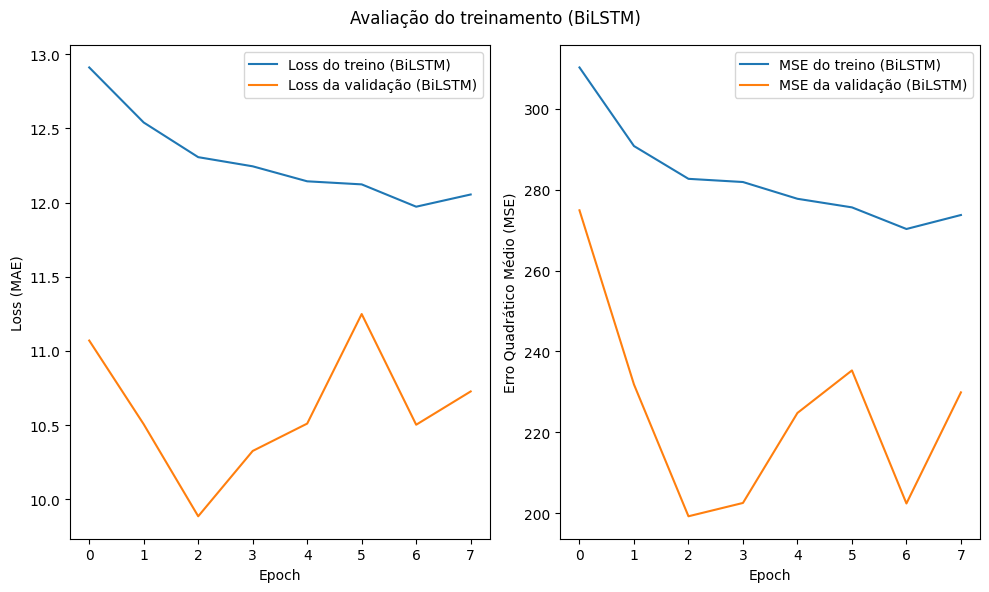

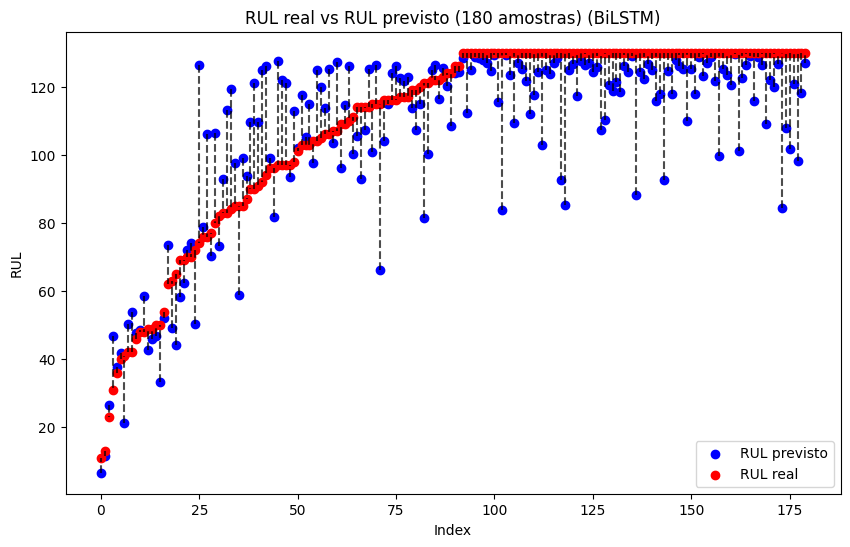

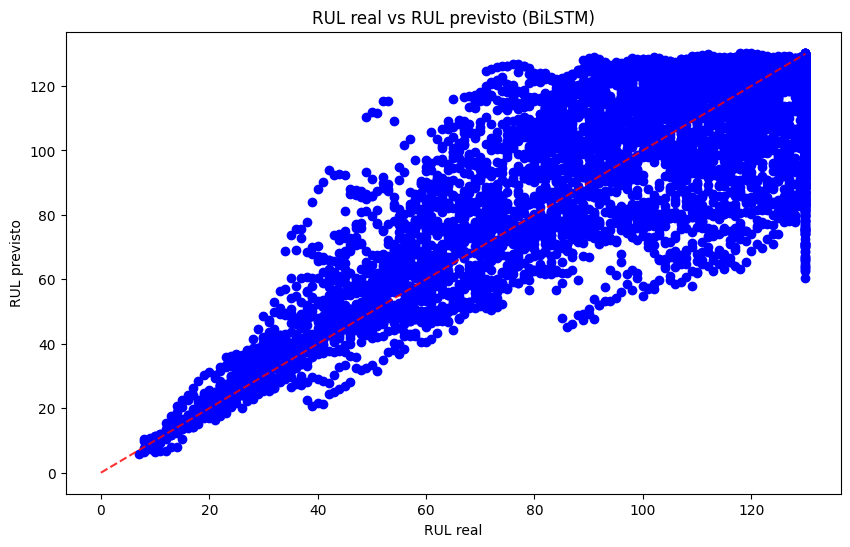

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 11.8129 - mean_squared_error: 261.8452

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 11.8948 - mean_squared_error: 264.9146 - val_loss: 9.9029 - val_mean_squared_error: 196.7801
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 11.7508 - mean_squared_error: 261.9841

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 11.7787 - mean_squared_error: 262.9462 - val_loss: 10.5248 - val_mean_squared_error: 212.5305
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 11.6981 - mean_squared_error: 265.0448

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 11.7905 - mean_squared_error: 267.3195 - val_loss: 10.3130 - val_mean_squared_error: 224.6200
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 11.4874 - mean_squared_error: 254.0786

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 11.7274 - mean_squared_error: 262.6355 - val_loss: 10.0355 - val_mean_squared_error: 203.4538
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 11.7107 - mean_squared_error: 256.6190

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 11.7490 - mean_squared_error: 260.4404 - val_loss: 11.0087 - val_mean_squared_error: 237.3686
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 11.4452 - mean_squared_error: 252.2926

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 11.6036 - mean_squared_error: 257.7898 - val_loss: 10.3574 - val_mean_squared_error: 238.7280
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 11.7448 - mean_squared_error: 265.3195

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 11.5690 - mean_squared_error: 257.0916 - val_loss: 9.8079 - val_mean_squared_error: 202.4430
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 11.4733 - mean_squared_error: 250.7785

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 11.4923 - mean_squared_error: 252.9305 - val_loss: 9.9527 - val_mean_squared_error: 197.7593
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 11.2862 - mean_squared_error: 243.0504

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - loss: 11.3601 - mean_squared_error: 247.7083 - val_loss: 10.0762 - val_mean_squared_error: 202.4240
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 11.6006 - mean_squared_error: 260.6075

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 11.4055 - mean_squared_error: 250.4076 - val_loss: 9.7277 - val_mean_squared_error: 183.3026
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 11.2822 - mean_squared_error: 245.5788

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 11.3250 - mean_squared_error: 248.4512 - val_loss: 9.7233 - val_mean_squared_error: 181.3394
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 11.1767 - mean_squared_error: 243.5550

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - loss: 11.3010 - mean_squared_error: 247.9984 - val_loss: 10.5209 - val_mean_squared_error: 214.0128
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 11.3182 - mean_squared_error: 242.3698

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 11.2508 - mean_squared_error: 243.8503 - val_loss: 9.5919 - val_mean_squared_error: 190.0077
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 11.3281 - mean_squared_error: 245.3512

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - loss: 11.2402 - mean_squared_error: 245.3573 - val_loss: 9.5120 - val_mean_squared_error: 185.0214
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 11.1556 - mean_squared_error: 241.2845

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 11.2182 - mean_squared_error: 246.8806 - val_loss: 10.1700 - val_mean_squared_error: 199.2377
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 11.3547 - mean_squared_error: 247.5147

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 11.1731 - mean_squared_error: 241.1371 - val_loss: 11.6820 - val_mean_squared_error: 260.0488
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 11.2761 - mean_squared_error: 247.5904

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 11.0867 - mean_squared_error: 239.4579 - val_loss: 9.4417 - val_mean_squared_error: 210.8499
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 11.0224 - mean_squared_error: 235.6088

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 11.0646 - mean_squared_error: 237.1183 - val_loss: 10.0473 - val_mean_squared_error: 191.5440
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.8920 - mean_squared_error: 232.6331

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.9272 - mean_squared_error: 235.6814 - val_loss: 10.2790 - val_mean_squared_error: 192.4892
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 11.1536 - mean_squared_error: 242.5446

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 11.0128 - mean_squared_error: 236.4818 - val_loss: 9.3737 - val_mean_squared_error: 182.7917
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 11.0262 - mean_squared_error: 236.1676

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.9425 - mean_squared_error: 234.3440 - val_loss: 10.0058 - val_mean_squared_error: 219.0401
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 11.0563 - mean_squared_error: 237.8895

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 10.9961 - mean_squared_error: 235.9316 - val_loss: 10.3745 - val_mean_squared_error: 228.6947
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 11.0984 - mean_squared_error: 242.0605

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 11.0132 - mean_squared_error: 236.7336 - val_loss: 9.9244 - val_mean_squared_error: 191.0440
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.9504 - mean_squared_error: 231.7637

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 10.9997 - mean_squared_error: 236.7611 - val_loss: 9.8330 - val_mean_squared_error: 195.7650
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.8500 - mean_squared_error: 231.1498

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 10.8393 - mean_squared_error: 231.7464 - val_loss: 10.0937 - val_mean_squared_error: 194.8935
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.8767 - mean_squared_error: 228.9315

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 10.8242 - mean_squared_error: 229.4110 - val_loss: 9.8668 - val_mean_squared_error: 188.9793
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.7520 - mean_squared_error: 227.6960

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 10.8495 - mean_squared_error: 231.5775 - val_loss: 9.2781 - val_mean_squared_error: 179.4675
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.6613 - mean_squared_error: 225.5806

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 10.7441 - mean_squared_error: 227.6827 - val_loss: 9.1891 - val_mean_squared_error: 202.6190
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 10.9112 - mean_squared_error: 235.8652

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 10.8356 - mean_squared_error: 232.2836 - val_loss: 9.7917 - val_mean_squared_error: 203.5429
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.8200 - mean_squared_error: 232.4542

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 10.6665 - mean_squared_error: 225.9881 - val_loss: 9.5704 - val_mean_squared_error: 180.9372
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 10.8692 - mean_squared_error: 232.5155

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 10.6941 - mean_squared_error: 227.7534 - val_loss: 9.9481 - val_mean_squared_error: 218.9045
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 10.7723 - mean_squared_error: 230.1518

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 10.6785 - mean_squared_error: 227.6283 - val_loss: 10.8122 - val_mean_squared_error: 221.6387
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 10.6808 - mean_squared_error: 228.9854

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 10.5479 - mean_squared_error: 222.8688 - val_loss: 10.6100 - val_mean_squared_error: 216.9187
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 10.5800 - mean_squared_error: 219.1777

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 10.6147 - mean_squared_error: 222.9606 - val_loss: 9.3717 - val_mean_squared_error: 173.5417
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.7546 - mean_squared_error: 229.5459

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 10.7127 - mean_squared_error: 227.7532 - val_loss: 9.2494 - val_mean_squared_error: 174.5924
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.6093 - mean_squared_error: 225.6600

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.5510 - mean_squared_error: 223.4494 - val_loss: 9.2278 - val_mean_squared_error: 181.0981
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.6739 - mean_squared_error: 227.1780

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 10.5650 - mean_squared_error: 221.8365 - val_loss: 8.9921 - val_mean_squared_error: 174.3711
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.4494 - mean_squared_error: 222.2710

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 10.5199 - mean_squared_error: 223.3029 - val_loss: 9.7329 - val_mean_squared_error: 179.1532
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.4554 - mean_squared_error: 220.1294

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.4790 - mean_squared_error: 221.1420 - val_loss: 9.8796 - val_mean_squared_error: 180.4353
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 10.5418 - mean_squared_error: 222.9224

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 10.5368 - mean_squared_error: 223.9242 - val_loss: 9.7294 - val_mean_squared_error: 175.5864
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.4364 - mean_squared_error: 221.5471

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 10.3637 - mean_squared_error: 219.4185 - val_loss: 9.6202 - val_mean_squared_error: 185.4707
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.2994 - mean_squared_error: 213.7863

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.3736 - mean_squared_error: 218.2637 - val_loss: 9.5006 - val_mean_squared_error: 185.1261
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 10.3686 - mean_squared_error: 215.2680

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 10.3855 - mean_squared_error: 215.8171 - val_loss: 11.2297 - val_mean_squared_error: 229.6880
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.3689 - mean_squared_error: 214.7619

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.3388 - mean_squared_error: 213.9785 - val_loss: 9.6528 - val_mean_squared_error: 177.3457
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.5764 - mean_squared_error: 223.6348

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 10.3199 - mean_squared_error: 213.3283 - val_loss: 9.1371 - val_mean_squared_error: 191.8619
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 10.0983 - mean_squared_error: 208.9319

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 10.2137 - mean_squared_error: 212.2431 - val_loss: 8.9368 - val_mean_squared_error: 165.7028
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.2117 - mean_squared_error: 212.3708

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.2023 - mean_squared_error: 211.6351 - val_loss: 10.4399 - val_mean_squared_error: 195.1834
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.1272 - mean_squared_error: 207.6444

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 10.1832 - mean_squared_error: 210.2249 - val_loss: 8.7145 - val_mean_squared_error: 164.3354
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.1801 - mean_squared_error: 212.3397

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 10.1734 - mean_squared_error: 212.3374 - val_loss: 9.3642 - val_mean_squared_error: 170.3296
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.0461 - mean_squared_error: 206.7751

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.1104 - mean_squared_error: 209.3957 - val_loss: 8.8571 - val_mean_squared_error: 194.3450
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.3726 - mean_squared_error: 222.6513

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 10.1898 - mean_squared_error: 213.8522 - val_loss: 9.1401 - val_mean_squared_error: 169.1334
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.1691 - mean_squared_error: 210.1769

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 10.1300 - mean_squared_error: 207.7807 - val_loss: 8.9806 - val_mean_squared_error: 175.6593
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 9.8402 - mean_squared_error: 198.6300

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 9.9672 - mean_squared_error: 202.4169 - val_loss: 9.8297 - val_mean_squared_error: 185.1455
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 10.0104 - mean_squared_error: 204.6476

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 10.0499 - mean_squared_error: 204.7168 - val_loss: 9.8961 - val_mean_squared_error: 190.0211
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 10.1710 - mean_squared_error: 211.2312

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 9.9900 - mean_squared_error: 203.4942 - val_loss: 9.2989 - val_mean_squared_error: 166.3436
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 9.9886 - mean_squared_error: 204.7996

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 9.9953 - mean_squared_error: 205.1881 - val_loss: 9.6496 - val_mean_squared_error: 173.3926
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 9.8258 - mean_squared_error: 197.6736

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 9.9109 - mean_squared_error: 201.7093 - val_loss: 9.7330 - val_mean_squared_error: 178.6843
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 9.7685 - mean_squared_error: 194.2320

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 9.8286 - mean_squared_error: 197.4885 - val_loss: 8.8483 - val_mean_squared_error: 160.8110
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 10.0238 - mean_squared_error: 203.1473

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 9.8928 - mean_squared_error: 199.2540 - val_loss: 9.0368 - val_mean_squared_error: 157.3348
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 9.8097 - mean_squared_error: 200.8640

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 9.8242 - mean_squared_error: 199.3719 - val_loss: 8.7495 - val_mean_squared_error: 176.2770
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 9.8336 - mean_squared_error: 200.7586

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 9.7666 - mean_squared_error: 196.7269 - val_loss: 10.0794 - val_mean_squared_error: 194.3482
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 9.6794 - mean_squared_error: 192.4449

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 9.7238 - mean_squared_error: 195.6755 - val_loss: 8.6056 - val_mean_squared_error: 155.6076
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 9.7720 - mean_squared_error: 198.3704

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 9.8284 - mean_squared_error: 199.9254 - val_loss: 9.3703 - val_mean_squared_error: 175.4653
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 9.6699 - mean_squared_error: 191.0020

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 9.7161 - mean_squared_error: 194.9913 - val_loss: 9.8216 - val_mean_squared_error: 194.0227
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 9.6098 - mean_squared_error: 190.0820

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 9.6658 - mean_squared_error: 191.8069 - val_loss: 9.6497 - val_mean_squared_error: 165.6417
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 9.6701 - mean_squared_error: 191.0212

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 9.7055 - mean_squared_error: 194.1364 - val_loss: 9.5339 - val_mean_squared_error: 170.2993
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 9.3068 - mean_squared_error: 179.2065

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 9.6040 - mean_squared_error: 190.7728 - val_loss: 8.8916 - val_mean_squared_error: 158.9323
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 9.6701 - mean_squared_error: 191.9355

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 9.9208 - mean_squared_error: 202.9881 - val_loss: 9.0197 - val_mean_squared_error: 168.5948
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 9.5061 - mean_squared_error: 187.1970

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 9.7537 - mean_squared_error: 195.7102 - val_loss: 8.8868 - val_mean_squared_error: 160.6091
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 9.6048 - mean_squared_error: 189.1942

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 9.6099 - mean_squared_error: 189.0778 - val_loss: 9.3709 - val_mean_squared_error: 161.3855
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 9.6966 - mean_squared_error: 192.7297

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 9.6929 - mean_squared_error: 193.6922 - val_loss: 9.5739 - val_mean_squared_error: 168.1677
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 9.5832 - mean_squared_error: 190.5135

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 9.5110 - mean_squared_error: 188.7903 - val_loss: 8.6241 - val_mean_squared_error: 151.1148
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 9.4324 - mean_squared_error: 184.5562

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 9.4419 - mean_squared_error: 184.7654 - val_loss: 10.6360 - val_mean_squared_error: 205.4918
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 9.5534 - mean_squared_error: 188.4274

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 9.5232 - mean_squared_error: 190.5183 - val_loss: 9.2038 - val_mean_squared_error: 201.6638
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 9.4334 - mean_squared_error: 183.2443

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - loss: 9.3491 - mean_squared_error: 182.2418 - val_loss: 9.4310 - val_mean_squared_error: 170.3575
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 9.2793 - mean_squared_error: 176.6725

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 9.3531 - mean_squared_error: 181.0928 - val_loss: 9.1576 - val_mean_squared_error: 162.4454
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 9.3226 - mean_squared_error: 181.0903

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 9.3206 - mean_squared_error: 179.9572 - val_loss: 8.0513 - val_mean_squared_error: 154.2209
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 9.2257 - mean_squared_error: 179.3318

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 9.1699 - mean_squared_error: 176.4403 - val_loss: 9.9668 - val_mean_squared_error: 187.3504
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 9.2579 - mean_squared_error: 180.0834

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 9.1971 - mean_squared_error: 176.7341 - val_loss: 8.7665 - val_mean_squared_error: 153.6892
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 9.2294 - mean_squared_error: 179.8450

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 9.1672 - mean_squared_error: 177.1940 - val_loss: 8.3622 - val_mean_squared_error: 144.4791
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 9.0912 - mean_squared_error: 174.1040

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 9.0560 - mean_squared_error: 170.8868 - val_loss: 10.6960 - val_mean_squared_error: 208.6413
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 9.0731 - mean_squared_error: 172.0108

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 9.0371 - mean_squared_error: 171.9089 - val_loss: 8.3982 - val_mean_squared_error: 138.5437
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [30]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
resultados_bilstm=[]
for k in range(n_iter):
    start=time.time()
    history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])
    rul_prev = best_model_bi.predict(x_test).reshape(-1)
    end=time.time()
    rul_prev = [float(x) for x in rul_prev]
    mse = mean_squared_error(y_test,rul_prev)
    rmse = np.sqrt(mean_squared_error(y_test,rul_prev))
    mae = mean_absolute_error(y_test,rul_prev)
    r2 = r2_score(y_test,rul_prev)
    tempo = end - start
    resultados_bilstm.append({'Iteração':k+1,'MSE':mse,'RMSE':rmse,'MAE':mae,'R2':r2,'tempo':tempo})
    if k == 0: #Gráficos do treinamento e do teste da primeira
        plt.figure(figsize=(10, 6))

        ax1=plt.subplot(1, 2, 1)
        plt.plot(history_bi.history['loss'], label='Loss do treino (BiLSTM)')
        plt.plot(history_bi.history['val_loss'], label='Loss da validação (BiLSTM)')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MAE)')
        plt.legend(loc='upper right')
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

        ax2=plt.subplot(1, 2, 2)
        plt.plot(history_bi.history['mean_squared_error'], label='MSE do treino (BiLSTM)')
        plt.plot(history_bi.history['val_mean_squared_error'], label='MSE da validação (BiLSTM)')
        plt.ylabel('Erro Quadrático Médio (MSE)')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')
        ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

        plt.suptitle('Avaliação do treinamento (BiLSTM)')
        plt.tight_layout()
        plt.show() 

        n_amostras = 180
        indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
        y_real_amostra=np.array(y_test)[indices]
        y_prev_amostra=np.array(rul_prev)[indices]
        ordem = np.argsort(y_real_amostra)
        y_real_amostra=y_real_amostra[ordem]
        y_prev_amostra=y_prev_amostra[ordem]

        plt.figure(figsize=(10,6))
        plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
        plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
        plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
        plt.ylabel('RUL')
        plt.xlabel('Index')
        plt.legend(loc='lower right')

        for i in range(len(indices)):
            plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
        
        plt.figure(figsize=(10,6))
        plt.scatter(y_test,rul_prev,c='blue')
        plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
        plt.title('RUL real vs RUL previsto (BiLSTM)')
        plt.ylabel('RUL previsto')
        plt.xlabel('RUL real')

        plt.show()

In [ ]:
##Tratamento estatístico 
from scipy.stats import wilcoxon

df_lstm = pd.DataFrame(resultados_lstm)
df_bilstm=pd.DataFrame(resultados_bilstm)

print('Resultados LSTM'.center(40,'-'))
print(f'{df_lstm.to_string(index=False)}\n') 
print('Resultados BiLSTM'.center(40,'-'))
print(f'{df_bilstm.to_string(index=False)}\n')

df_lstm=df_lstm.drop(columns=['Iteração']) 
df_bilstm=df_bilstm.drop(columns=['Iteração'])

resumo_lstm = pd.DataFrame({'Média':df_lstm.mean(),
                            'Desvio padrão': df_lstm.std()})
resumo_bilstm= pd.DataFrame({'Média':df_bilstm.mean(),
                             'Desvio padrão':df_bilstm.std()})

print('Resumo LSTM'.center(40,'-'))
print(f'{resumo_lstm}\n')
print('Resumo BiLSTM'.center(40,'-'))
print(f'{resumo_bilstm}\n')

diferencas= df_lstm-df_bilstm
diferencas = diferencas.drop(columns=['tempo'])
print('Teste de Wilcoxon'.center(40,'-'))
threshold = 0.05
for metrica in diferencas.columns:
    valorp = wilcoxon(diferencas[metrica]).pvalue
    if valorp < threshold:
        conclusao = 'A diferença é estatisticamente significativa'
        print(f'O p-value para {metrica} é {valorp}. {conclusao}')
    else:
        conclusao = 'A diferença não é estatisticamente significativa'
        print(f'O p-value para {metrica} é {valorp}. {conclusao}')

------------Resultados LSTM-------------
 Iteração        MSE      RMSE       MAE       R2      tempo
        1 247.625963 15.736136 10.910847 0.749958 343.569674
        2 246.863410 15.711888 10.150135 0.750728  72.907083
        3 288.203028 16.976543 10.297584 0.708985 105.234053
        4 254.112344 15.940902 10.316716 0.743408 181.821535
        5 243.983824 15.619982 10.672619 0.753635 160.811012
        6 249.987400 15.810990  9.813523 0.747573  68.121218
        7 260.329502 16.134730 10.213627 0.737130  74.594893
        8 276.444465 16.626619 10.720762 0.720858 100.824112
        9 256.213106 16.006658  9.926533 0.741287 156.403799
       10 255.554044 15.986058 10.591938 0.741952  73.462262

-----------Resultados BiLSTM------------
 Iteração        MSE      RMSE       MAE       R2      tempo
        1 285.659104 16.901453 12.303073 0.711553 129.847585
        2 247.493012 15.731911 11.307717 0.750092  52.487361
        3 254.477117 15.952339 12.240471 0.743040 192.542195
  